In [3]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
iris = pd.read_csv("C:/Users/Lenovo/Downloads/Iris.csv")

In [5]:
iris.head(2) 

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa


In [6]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
iris.drop('Id',axis=1,inplace=True)

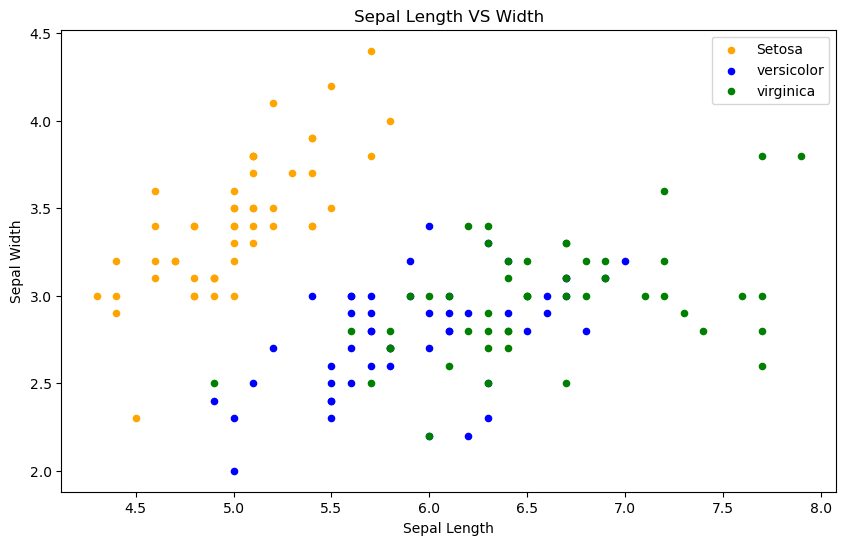

In [8]:
fig = iris[iris.Species=='Iris-setosa'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='orange', label='Setosa')
iris[iris.Species=='Iris-versicolor'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='blue', label='versicolor',ax=fig)
iris[iris.Species=='Iris-virginica'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='green', label='virginica', ax=fig)
fig.set_xlabel("Sepal Length")
fig.set_ylabel("Sepal Width")
fig.set_title("Sepal Length VS Width")
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()

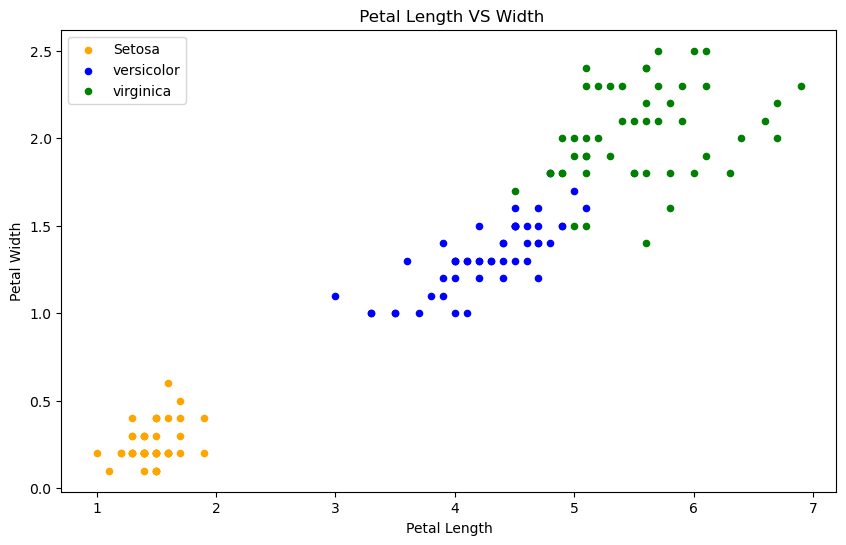

In [9]:
fig = iris[iris.Species=='Iris-setosa'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='orange', label='Setosa')
iris[iris.Species=='Iris-versicolor'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='blue', label='versicolor',ax=fig)
iris[iris.Species=='Iris-virginica'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='green', label='virginica', ax=fig)
fig.set_xlabel("Petal Length")
fig.set_ylabel("Petal Width")
fig.set_title(" Petal Length VS Width")
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()

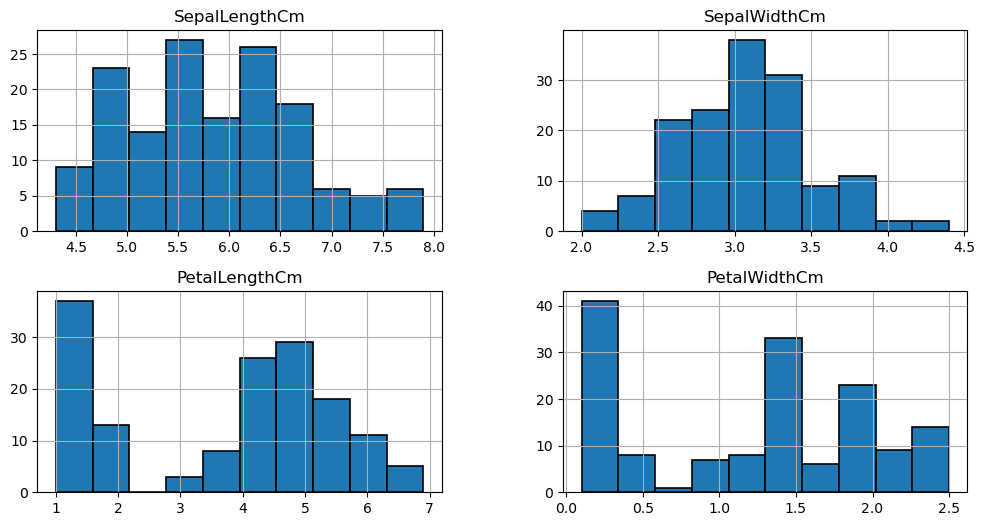

In [10]:
iris.hist(edgecolor='black', linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()

<Axes: xlabel='Species', ylabel='SepalWidthCm'>

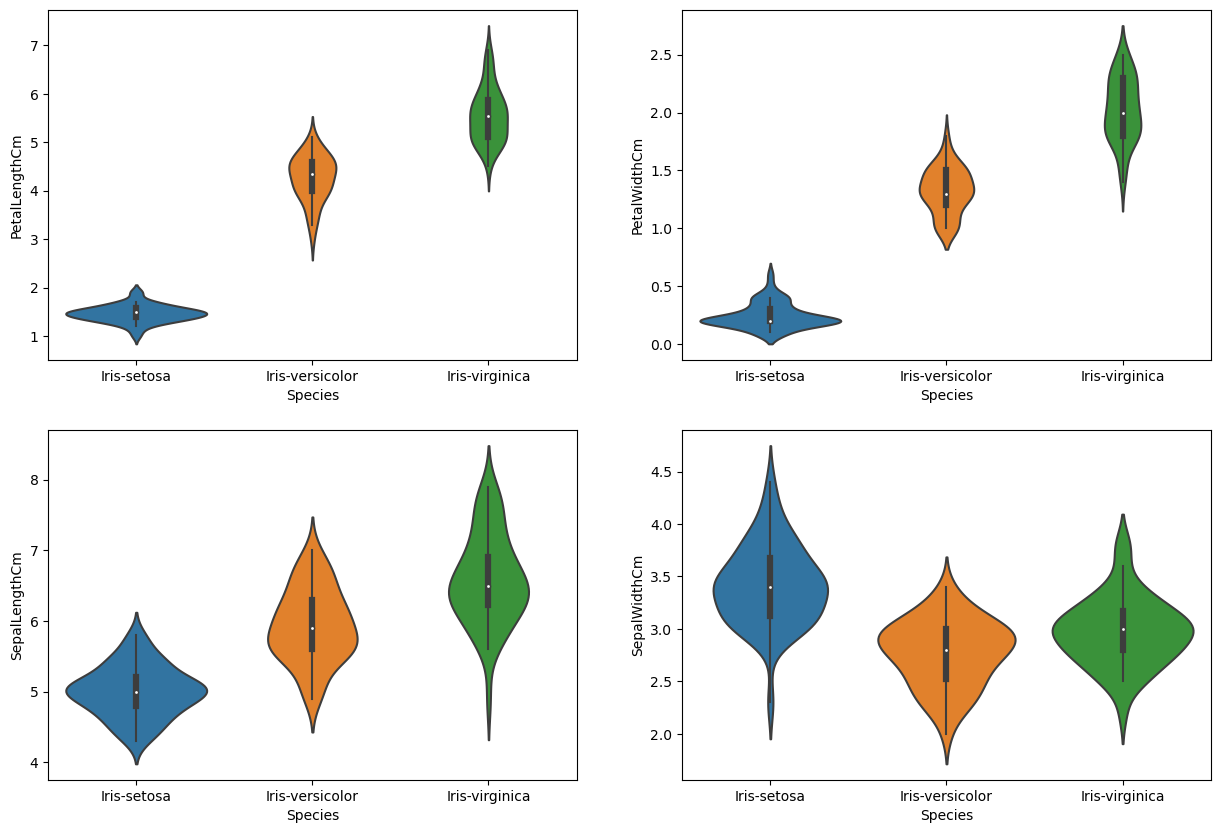

In [11]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='Species',y='PetalLengthCm',data=iris)
plt.subplot(2,2,2)
sns.violinplot(x='Species',y='PetalWidthCm',data=iris)
plt.subplot(2,2,3)
sns.violinplot(x='Species',y='SepalLengthCm',data=iris)
plt.subplot(2,2,4)
sns.violinplot(x='Species',y='SepalWidthCm',data=iris)

In [13]:
# importing alll the necessary packages to use the  classification algorithms
from sklearn.model_selection import train_test_split #to split the dataset for training and testing
from sklearn import metrics #for checking the model accuracy
from sklearn.tree import DecisionTreeClassifier #for using Decision Tree Algoithm

In [14]:
iris.shape

(150, 5)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_4568\3758379432.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(iris.corr(),annot=True,cmap='cubehelix_r') #draws  heatmap with input as the correlation matrix calculted by(iris.corr())


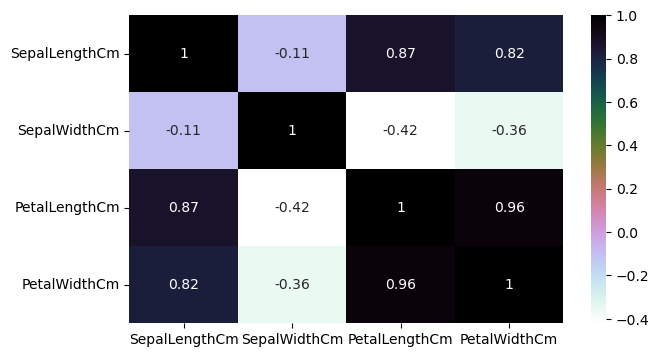

In [15]:
plt.figure(figsize=(7,4)) 
sns.heatmap(iris.corr(),annot=True,cmap='cubehelix_r') #draws  heatmap with input as the correlation matrix calculted by(iris.corr())
plt.show()

In [16]:
train, test = train_test_split(iris, test_size = 0.3)# in this our main data is split into train and test
# the attribute test_size=0.3 splits the data into 70% and 30% ratio. train=70% and test=30%
print(train.shape)
print(test.shape)

(105, 5)
(45, 5)


In [17]:
train_X = train[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]# taking the training data features
train_y=train.Species# output of our training data
test_X= test[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']] # taking test data features
test_y =test.Species   #output value of test data

In [18]:
train_X.head(2)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
57,4.9,2.4,3.3,1.0
11,4.8,3.4,1.6,0.2


In [19]:
test_X.head(2)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
75,6.6,3.0,4.4,1.4
65,6.7,3.1,4.4,1.4


In [20]:
train_y.head()

57    Iris-versicolor
11        Iris-setosa
69    Iris-versicolor
85    Iris-versicolor
29        Iris-setosa
Name: Species, dtype: object

In [21]:
model=DecisionTreeClassifier()
model.fit(train_X,train_y)
prediction=model.predict(test_X)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction,test_y))

The accuracy of the Decision Tree is 0.9555555555555556


In [23]:
petal=iris[['PetalLengthCm','PetalWidthCm','Species']]
sepal=iris[['SepalLengthCm','SepalWidthCm','Species']]

In [24]:
train_p,test_p=train_test_split(petal,test_size=0.3,random_state=0)  #petals
train_x_p=train_p[['PetalWidthCm','PetalLengthCm']]
train_y_p=train_p.Species
test_x_p=test_p[['PetalWidthCm','PetalLengthCm']]
test_y_p=test_p.Species


train_s,test_s=train_test_split(sepal,test_size=0.3,random_state=0)  #Sepal
train_x_s=train_s[['SepalWidthCm','SepalLengthCm']]
train_y_s=train_s.Species
test_x_s=test_s[['SepalWidthCm','SepalLengthCm']]
test_y_s=test_s.Species

In [25]:
model=DecisionTreeClassifier()
model.fit(train_x_p,train_y_p) 
prediction=model.predict(test_x_p) 
print('The accuracy of the Decision Tree using Petals is:',metrics.accuracy_score(prediction,test_y_p))

model.fit(train_x_s,train_y_s) 
prediction=model.predict(test_x_s) 
print('The accuracy of the Decision Tree using Sepals is:',metrics.accuracy_score(prediction,test_y_s))

The accuracy of the Decision Tree using Petals is: 0.9555555555555556
The accuracy of the Decision Tree using Sepals is: 0.6666666666666666


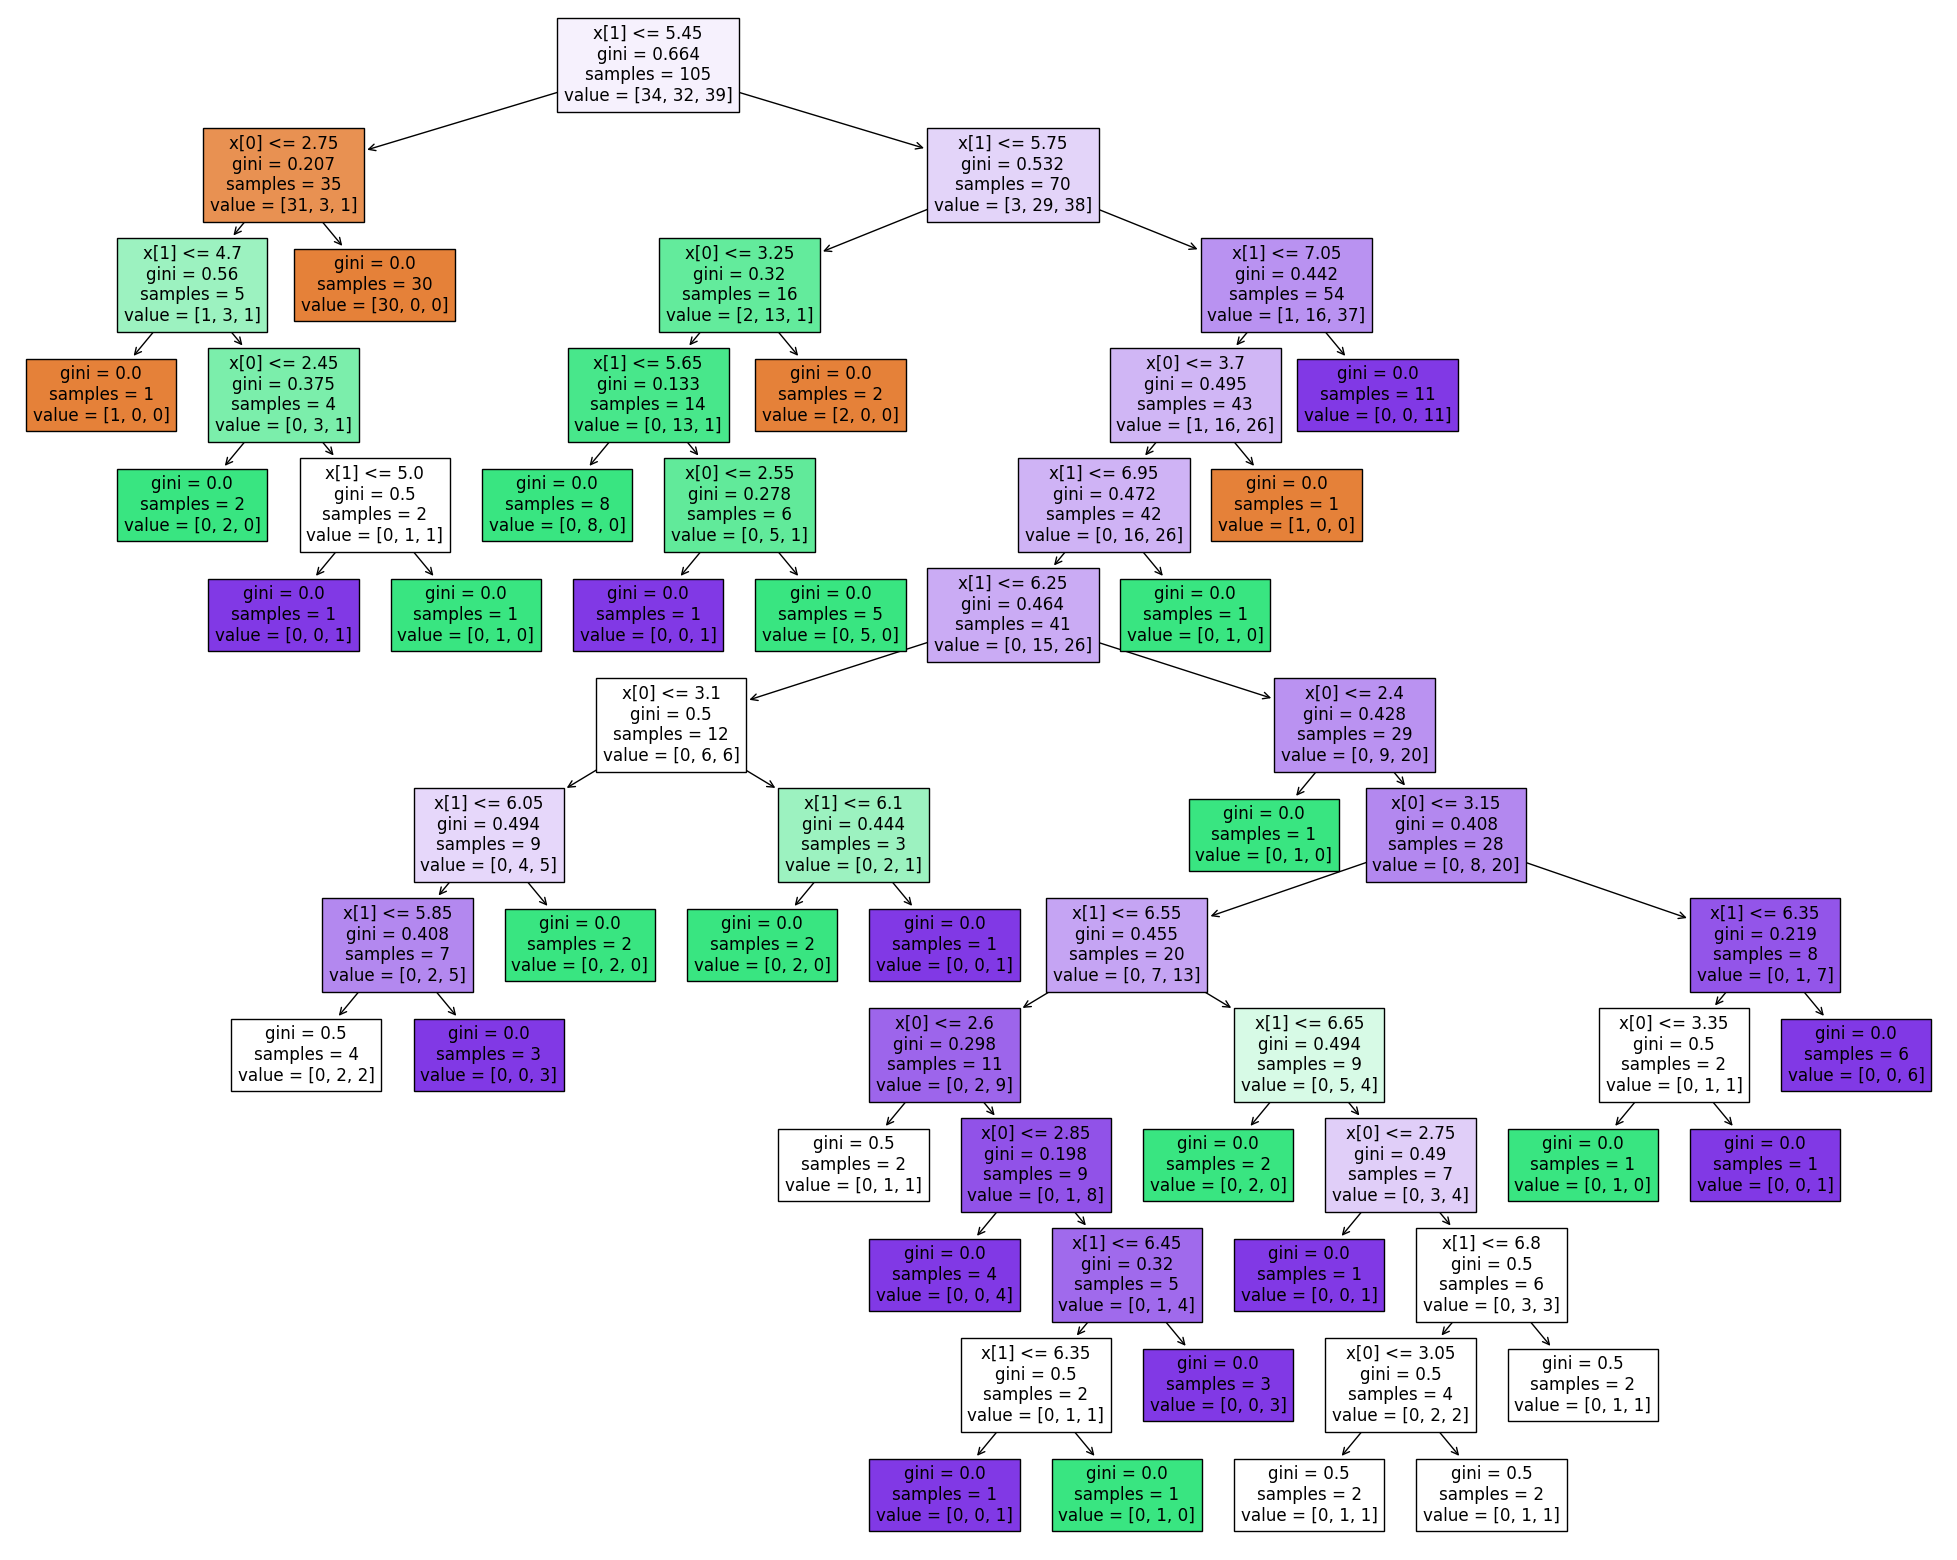

In [42]:
from sklearn import tree
clf = DecisionTreeClassifier(random_state=1234)
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf.fit(train_x_s,train_y_s),filled=True)